# Handwritten Letter Classification 

In [ ]:
dataset_url="https://www.kaggle.com/datasets/munemshahriar642/english-typed-font-in-csv"

In [8]:
import pandas as pd

In [15]:
df=pd.read_csv('C:/Users/Janhavi/TCS ML/english-typed-font-in-csv/typedCSV.csv')

In [16]:
df.head()

,label,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0,255,255,255,255,255,255,255,255,253,...,250,255,255,251,255,255,255,255,255,255
1,0,255,255,255,255,255,255,255,255,255,...,254,255,255,255,249,253,255,255,255,255
2,0,255,255,255,255,255,255,255,255,254,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,253,255,253,251,255,254,255,255,...,255,255,253,253,255,255,255,255,255,255


In [17]:
df.shape

(62992, 785)

In [18]:
df=df[df['label'].isin(list(range(10,36)))]

In [19]:
df.shape

(26416, 785)

In [20]:
X=df.drop('label', axis=1)
y=df[['label']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train, X_test= X_train/ 255.0, X_test/ 255.0

In [26]:
import numpy as np

In [27]:
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28)) 
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28))

In [28]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test =  X_test.reshape(X_test.shape[0],  X_test.shape[1],  X_test.shape[2],1)

In [29]:
ytr_ohe=pd.get_dummies(y_train['label']).to_numpy()
ytst_ohe=pd.get_dummies(y_test['label']).to_numpy()

In [2]:
import string
letrs_dict=dict(zip( range(26),string.ascii_uppercase))

In [4]:
list[letrs_dict]

list[{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}]

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2

In [38]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
# model.add(Dense(26,activation ="softmax"))
model.add(Dense(26, kernel_regularizer = l2(0.01),activation= "softmax"))

In [39]:
# model.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
history = model.fit(X_train, ytr_ohe, epochs=10,  validation_data = (X_test, ytst_ohe))

Epoch 1/10


661/661 [==============================] - 20s 25ms/step - loss: 0.9073 - accuracy: 0.8007 - val_loss: 0.4016 - val_accuracy: 0.9305
Epoch 2/10
661/661 [==============================] - 16s 25ms/step - loss: 0.3364 - accuracy: 0.9355 - val_loss: 0.2879 - val_accuracy: 0.9468
Epoch 3/10
661/661 [==============================] - 19s 29ms/step - loss: 0.2261 - accuracy: 0.9567 - val_loss: 0.2392 - val_accuracy: 0.9502
Epoch 4/10
661/661 [==============================] - 19s 29ms/step - loss: 0.1766 - accuracy: 0.9645 - val_loss: 0.1898 - val_accuracy: 0.9620
Epoch 5/10
661/661 [==============================] - 19s 28ms/step - loss: 0.1393 - accuracy: 0.9723 - val_loss: 0.1638 - val_accuracy: 0.9665
Epoch 6/10
661/661 [==============================] - 17s 25ms/step - loss: 0.1224 - accuracy: 0.9762 - val_loss: 0.1372 - val_accuracy: 0.9724
Epoch 7/10
661/661 [==============================] - 16s 24ms/step - loss: 0.0981 - accuracy: 0.9811 - val_loss: 0.1132 - val_accurac

In [41]:
print("validation accuracy :", history.history['val_accuracy'])
print("training accuracy :", history.history['accuracy'])
print("validation loss :", history.history['val_loss'])
print("training loss :", history.history['loss'])

validation accuracy : [0.9305450320243835, 0.9468206167221069, 0.9502270817756653, 0.9619606137275696, 0.9665026664733887, 0.9723694324493408, 0.978236198425293, 0.9748296737670898, 0.9797502160072327, 0.9740726947784424]
training accuracy : [0.8006814122200012, 0.9354533553123474, 0.9567480683326721, 0.9644615054130554, 0.9722695350646973, 0.9761972427368164, 0.9810713529586792, 0.9842892289161682, 0.9854249358177185, 0.9878856539726257]
validation loss : [0.40162500739097595, 0.2878623902797699, 0.23916243016719818, 0.18984654545783997, 0.16382138431072235, 0.13723613321781158, 0.11324380338191986, 0.12286213785409927, 0.10968242585659027, 0.12289539724588394]
training loss : [0.9072678089141846, 0.3364036977291107, 0.22607862949371338, 0.17663459479808807, 0.1393134891986847, 0.12235905975103378, 0.09810729324817657, 0.08360574394464493, 0.07927059382200241, 0.06862291693687439]


In [42]:
import matplotlib.pyplot as plt

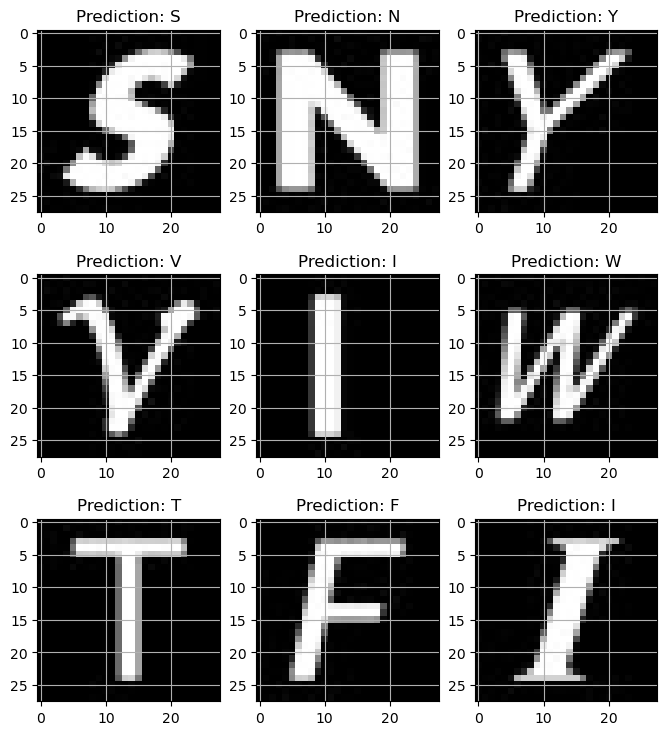

In [46]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = letrs_dict[np.argmax(ytst_ohe[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()